## Text Representation
- Bag of Words model
- Bag of N-Grams model
- TF-IDF model
- Similarity features
- Topic models
- Word2Vec
- GloVe
- FastText

In [19]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline

# Traditional Feature Engineering Models

#### Simple Corpus of text Documents

In [2]:
corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
          'I love green eggs, ham, sausages and bacon!',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!'    
]
labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals']

corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus, 
                          'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, e...",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beaut...,weather
7,The dog is lazy but the brown fox is quick!,animals


#### Simple text Processing

In [3]:
def normalize_document(doc):
    # remove special character
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    # lower case
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.WordPunctTokenizer().tokenize(doc)
    # filter out stopwords
    filtered_tokens = [token for token in tokens if token not in nltk.corpus.stopwords.words('english')]
    # recreate document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc
    
normalize_corpus = np.vectorize(normalize_document)

In [4]:
norm_corpus = normalize_corpus(corpus)
norm_corpus

array(['sky blue beautiful', 'love blue beautiful sky',
       'quick brown fox jumps lazy dog',
       'kings breakfast sausages ham bacon eggs toast beans',
       'love green eggs ham sausages bacon',
       'brown fox quick blue dog lazy', 'sky blue sky beautiful today',
       'dog lazy brown fox quick'], dtype='<U51')

### 1. Bag of Words
The Bag of Words model represents each text document as a numeric vector where each dimension is a specific word from the corpus and the value could be its frequency in the document, occurrence (denoted by 1 or 0), or even weighted values. The model’s name is such because each document is represented literally as a bag of its own words, disregarding word order, sequences, and grammar.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

# bag of words features in sparse format
cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(norm_corpus)
# matrix is sparse
cv_matrix

<8x20 sparse matrix of type '<class 'numpy.int64'>'
	with 42 stored elements in Compressed Sparse Row format>

In [6]:
# non-zero positions in the parse matrix
print(cv_matrix)

  (0, 17)	1
  (0, 3)	1
  (0, 2)	1
  (1, 17)	1
  (1, 3)	1
  (1, 2)	1
  (1, 14)	1
  (2, 15)	1
  (2, 5)	1
  (2, 8)	1
  (2, 11)	1
  (2, 13)	1
  (2, 6)	1
  (3, 12)	1
  (3, 4)	1
  (3, 16)	1
  (3, 10)	1
  (3, 0)	1
  (3, 7)	1
  (3, 18)	1
  (3, 1)	1
  (4, 14)	1
  (4, 16)	1
  (4, 10)	1
  (4, 0)	1
  (4, 7)	1
  (4, 9)	1
  (5, 3)	1
  (5, 15)	1
  (5, 5)	1
  (5, 8)	1
  (5, 13)	1
  (5, 6)	1
  (6, 17)	2
  (6, 3)	1
  (6, 2)	1
  (6, 19)	1
  (7, 15)	1
  (7, 5)	1
  (7, 8)	1
  (7, 13)	1
  (7, 6)	1


In [7]:
# dense representation of sparse matrix
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]],
      dtype=int64)

In [8]:
# vocab or features in the corpus
vocab = cv.get_feature_names()

pd.DataFrame(cv_matrix, columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0
3,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0
5,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0
6,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1
7,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0


Each column represents a feature and each row represents a single documents.

### 2. Bag of N-Grams Model
Bag of words(1-gram) does not consider the order of words. But if we want to take into account phrases or collection of words that occur in a sequence, N-grams help us.

In [9]:
bv = CountVectorizer(ngram_range=(2,2))
bv_matrix = bv.fit_transform(norm_corpus)
bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names()
pd.DataFrame(bv_matrix, columns=vocab)

,bacon eggs,beautiful sky,beautiful today,blue beautiful,blue dog,blue sky,breakfast sausages,brown fox,dog lazy,eggs ham,...,lazy dog,love blue,love green,quick blue,quick brown,sausages bacon,sausages ham,sky beautiful,sky blue,toast beans
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
7,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


### 3. TF-IDF Model
There might be some terms that occur frequently across all documents and these may tend to overshadow other terms in the feature set.Especially words that do not occur as frequently, but might be more interesting and effective as features to identify specific categories. This is where TF-IDF comes into the picture. TF-IDF stands for term frequency-inverse document frequency. It’s a combination of two metrics, term frequency(tf) and inverse document frequency (idf ).

$TfIdf = Tf\times Idf$

<i>Term frequency($Tf$)</i> in any document vector is denoted by the raw frequency value of that term in a particular document.

<i>Inverse document frequency</i> denoted by $Idf$ is the inverse of the document frequency
for each term and is computed by dividing the total number of documents in our corpus
by the document frequency for each term and then applying logarithmic scaling to the
result.

$$ Idf(w,D) = 1 + \log \frac{N}{1+df(w)}$$

where, <br/>
$D$: Document <br/>
$w$ : Term/word <br/>
$Idf(w,D)$: $Idf$ for term $w$ in document $D$ <br/>
$N$: Total number of documents <br/>
$df(w)$: Number of document the word $w$ apperaed in <br/>

The final TF-IDF metric that we will be using is a normalized version of the tfidf matrix that we get from the product of tf and idf.

In [10]:
# Using TfidfTransformer
from sklearn.feature_extraction.text import TfidfTransformer

tt = TfidfTransformer(norm='l2', use_idf=True)
tt_matrix = tt.fit_transform(cv_matrix)
tt_matrix = tt_matrix.toarray()
vocab = cv.get_feature_names()
pd.DataFrame(np.round(tt_matrix, 2), columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.00,0.00,0.60,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.0
1,0.00,0.00,0.49,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.49,0.00,0.0
2,0.00,0.00,0.00,0.00,0.00,0.38,0.38,0.00,0.38,0.00,0.00,0.53,0.00,0.38,0.00,0.38,0.00,0.00,0.00,0.0
3,0.32,0.38,0.00,0.00,0.38,0.00,0.00,0.32,0.00,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.32,0.00,0.38,0.0
4,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.47,0.39,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.0
5,0.00,0.00,0.00,0.37,0.00,0.42,0.42,0.00,0.42,0.00,0.00,0.00,0.00,0.42,0.00,0.42,0.00,0.00,0.00,0.0
6,0.00,0.00,0.36,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.5
7,0.00,0.00,0.00,0.00,0.00,0.45,0.45,0.00,0.45,0.00,0.00,0.00,0.00,0.45,0.00,0.45,0.00,0.00,0.00,0.0


In [11]:
# Using TfidfVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(min_df=0., max_df=1., norm='l2',
use_idf=True, smooth_idf=True)
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()
vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.00,0.00,0.60,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.0
1,0.00,0.00,0.49,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.49,0.00,0.0
2,0.00,0.00,0.00,0.00,0.00,0.38,0.38,0.00,0.38,0.00,0.00,0.53,0.00,0.38,0.00,0.38,0.00,0.00,0.00,0.0
3,0.32,0.38,0.00,0.00,0.38,0.00,0.00,0.32,0.00,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.32,0.00,0.38,0.0
4,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.47,0.39,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.0
5,0.00,0.00,0.00,0.37,0.00,0.42,0.42,0.00,0.42,0.00,0.00,0.00,0.00,0.42,0.00,0.42,0.00,0.00,0.00,0.0
6,0.00,0.00,0.36,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.5
7,0.00,0.00,0.00,0.00,0.00,0.45,0.45,0.00,0.45,0.00,0.00,0.00,0.00,0.45,0.00,0.45,0.00,0.00,0.00,0.0


#### Extracting Features for new Document

In [12]:
new_doc = 'The sky is gloomy and it is cold'
pd.DataFrame(np.round(tv.transform([new_doc]).toarray(), 2),
columns=tv.get_feature_names())

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### 4. Document Similarity
Document similarity is the process of using a distance or similarity based metric that
can identify how similar a text document is to any other document(s) based on features
extracted from the documents, like Bag of Words or TF-IDF. Domains such as search engines, document clustering, and information retrieval can be leveraged using these similarity based features.

In [13]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7
0,1.000000,0.820599,0.000000,0.000000,0.000000,0.192353,0.817246,0.000000
1,0.820599,1.000000,0.000000,0.000000,0.225489,0.157845,0.670631,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.791821,0.000000,0.850516
3,0.000000,0.000000,0.000000,1.000000,0.506866,0.000000,0.000000,0.000000
4,0.000000,0.225489,0.000000,0.506866,1.000000,0.000000,0.000000,0.000000
5,0.192353,0.157845,0.791821,0.000000,0.000000,1.000000,0.115488,0.930989
6,0.817246,0.670631,0.000000,0.000000,0.000000,0.115488,1.000000,0.000000
7,0.000000,0.000000,0.850516,0.000000,0.000000,0.930989,0.000000,1.000000


In [14]:

from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(similarity_matrix, 'ward')
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2', 
                         'Distance', 'Cluster Size'], dtype='object')

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,2.0,7.0,0.253098,2.0
1,0.0,6.0,0.308539,2.0
2,5.0,8.0,0.386952,3.0
3,1.0,9.0,0.489845,3.0
4,3.0,4.0,0.732945,2.0
5,11.0,12.0,2.695647,5.0
6,10.0,13.0,3.451082,8.0


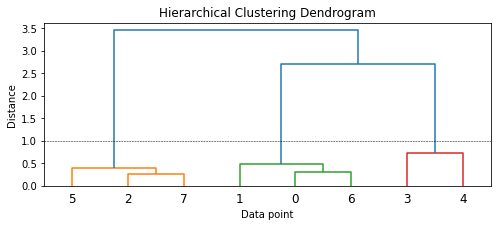

In [18]:
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0, c='k', ls='--', lw=0.5)